# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Your OpenWeatherMap API key
api_key = "2d9a298dccca3e1dcbf11d30b6b3f717"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | arawa
Processing Record 3 of Set 1 | chibuto
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | pyt-yakh
Processing Record 6 of Set 1 | atafu village
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | westport
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | puerto baquerizo moreno
Processing Record 13 of Set 1 | weno
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | duncan town
City not found. Skipping... 'coord'
Processing Record 16 of Set 1 | mahina
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | tsiombe
Processing Record 19 of Set 1 | mariinsk
Processing Record 20 of Set 1 | grenville
Processing Record 21 of Set 1 | whiteho

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,291.59,98,100,11.06,SH,1704782899
1,arawa,-6.2132,155.5367,301.29,88,100,1.13,PG,1704782900
2,chibuto,-24.6867,33.5306,303.25,50,7,1.75,MZ,1704782900
3,hermanus,-34.4187,19.2345,293.69,69,10,5.00,ZA,1704782895
4,pyt-yakh,60.7499,72.8582,251.85,92,76,4.77,RU,1704782900


In [27]:
# Create the output_data directory if it doesn't exist
output_data_dir = "output_data"
os.makedirs(output_data_dir, exist_ok=True)

# Export the City_Data into a CSV file
city_data_df.to_csv(os.path.join(output_data_dir, "cities.csv"), index_label="City_ID")

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,291.59,98,100,11.06,SH,1704782899
1,arawa,-6.2132,155.5367,301.29,88,100,1.13,PG,1704782900
2,chibuto,-24.6867,33.5306,303.25,50,7,1.75,MZ,1704782900
3,hermanus,-34.4187,19.2345,293.69,69,10,5.00,ZA,1704782895
4,pyt-yakh,60.7499,72.8582,251.85,92,76,4.77,RU,1704782900


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

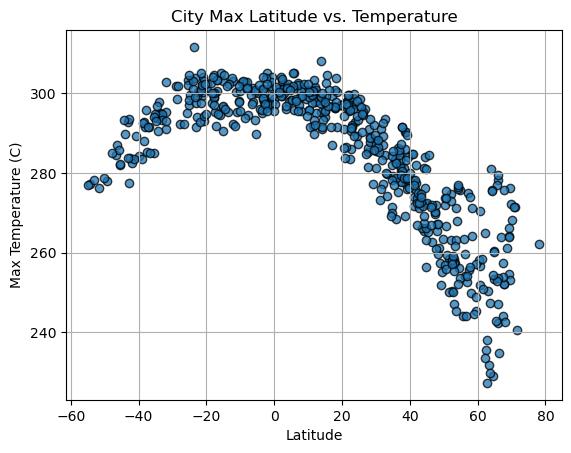

In [29]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

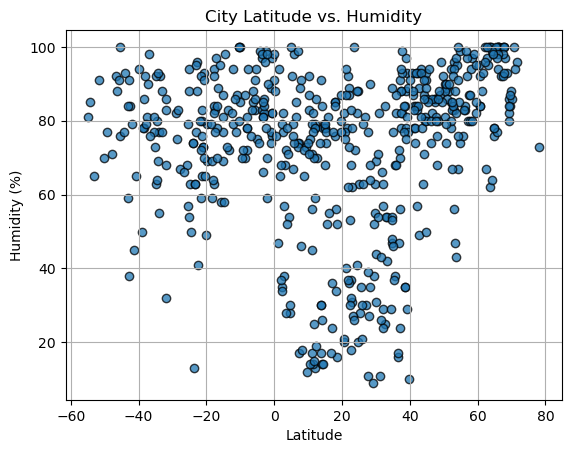

In [30]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

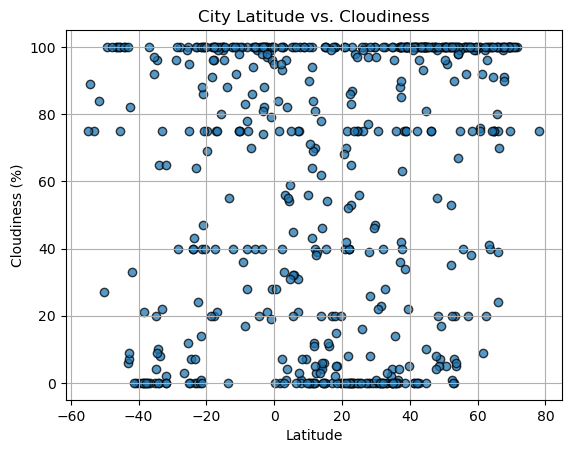

In [31]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

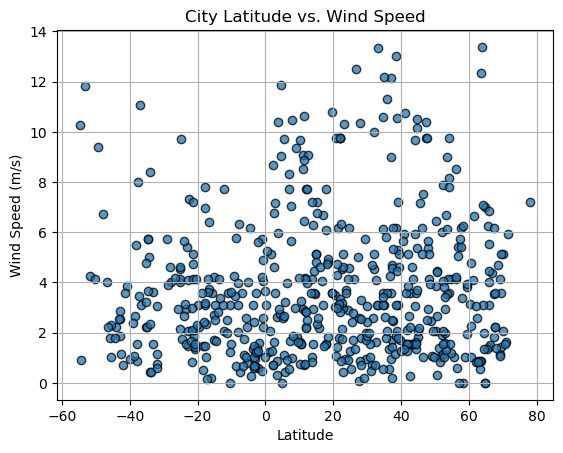

In [32]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere, color, filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    r_squared = f"R-squared: {round(rvalue**2, 2)}"

    plt.scatter(x_values, y_values, color=color, alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.annotate(r_squared, (min(x_values), max(y_values)), fontsize=12, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid(True)
    plt.savefig(f"output_data/{filename}.png")
    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,pyt-yakh,60.7499,72.8582,251.85,92,76,4.77,RU,1704782900
6,qaqortoq,60.7167,-46.0333,270.39,84,100,2.25,GL,1704782901
9,westport,41.1415,-73.3579,273.99,78,0,1.54,US,1704782752
12,weno,7.4515,151.8468,302.12,74,75,5.66,FM,1704782902
17,mariinsk,56.2139,87.7472,259.72,83,100,8.53,RU,1704782903


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,291.59,98,100,11.06,SH,1704782899
1,arawa,-6.2132,155.5367,301.29,88,100,1.13,PG,1704782900
2,chibuto,-24.6867,33.5306,303.25,50,7,1.75,MZ,1704782900
3,hermanus,-34.4187,19.2345,293.69,69,10,5.00,ZA,1704782895
5,atafu village,-8.5421,-172.5159,302.79,70,17,5.78,TK,1704782900


###  Temperature vs. Latitude Linear Regression Plot

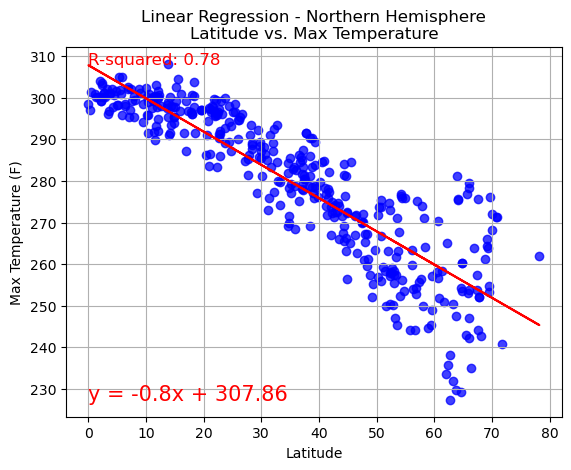

In [41]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Linear Regression - Northern Hemisphere\nLatitude vs. Max Temperature",
                       "Latitude", "Max Temperature (F)", "Northern", "blue", "Northern_Hemi_Temp")


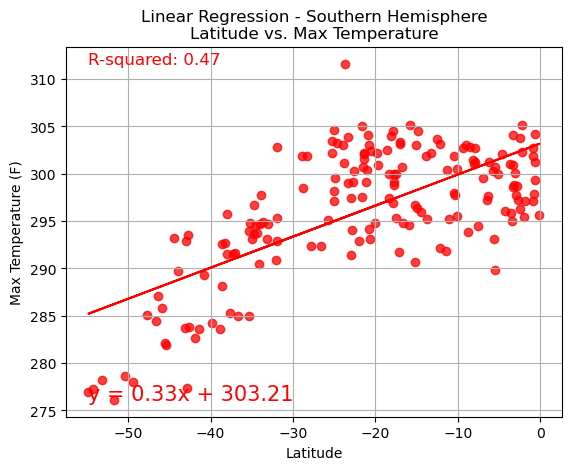

In [42]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Linear Regression - Southern Hemisphere\nLatitude vs. Max Temperature",
                       "Latitude", "Max Temperature (F)", "Southern", "red", "Southern_Hemi_Temp")


**Discussion about the linear relationship:** YOUR RESPONSE HERE
Northern Hemisphere: The linear regression plot for Latitude vs. Max Temperature in the Northern Hemisphere shows a negative correlation. A negative correlation suggests that as we move towards higher latitudes in the Northern Hemisphere, the Max Temperature tends to decrease.
Southern Hemisphere: The linear regression plot for Latitude vs. Max Temperature in the Southern Hemisphere shows a positive correlation. A positive correlation implies that as we move towards lower latitudes in the Southern Hemisphere, the Max Temperature tends to increase.


### Humidity vs. Latitude Linear Regression Plot

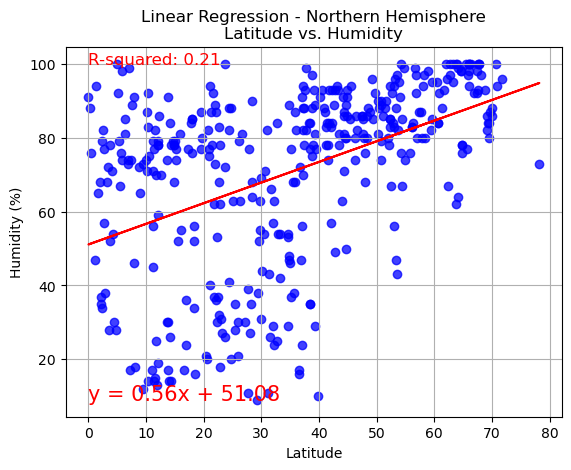

In [43]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Linear Regression - Northern Hemisphere\nLatitude vs. Humidity",
                       "Latitude", "Humidity (%)", "Northern", "blue", "Northern_Hemi_Humidity")


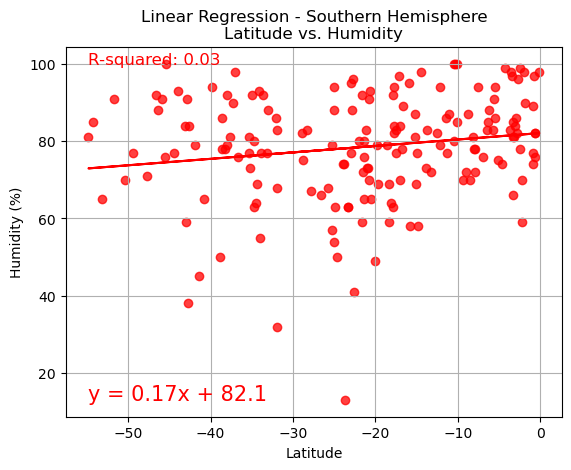

In [44]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Linear Regression - Southern Hemisphere\nLatitude vs. Humidity",
                       "Latitude", "Humidity (%)", "Southern", "red", "Southern_Hemi_Humidity")


**Discussion about the linear relationship:** YOUR RESPONSE HERE
These linear regression analyses and plots suggest that latitude alone may not be a robust predictor of humidity levels in either hemisphere. Other environmental and geographical factors likely contribute to the variability in humidity observed at different latitudes. 

### Cloudiness vs. Latitude Linear Regression Plot

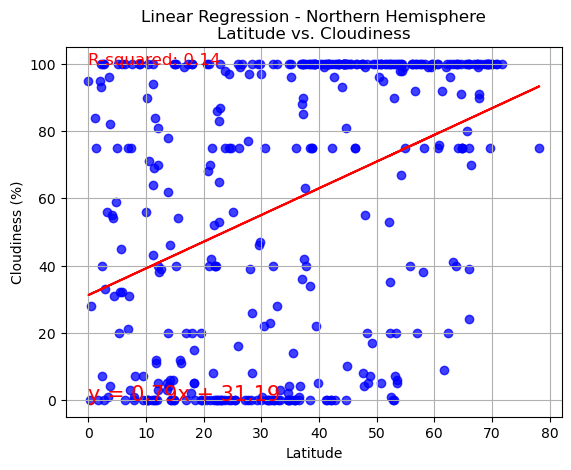

In [45]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Linear Regression - Northern Hemisphere\nLatitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)", "Northern", "blue", "Northern_Hemi_Cloudiness")


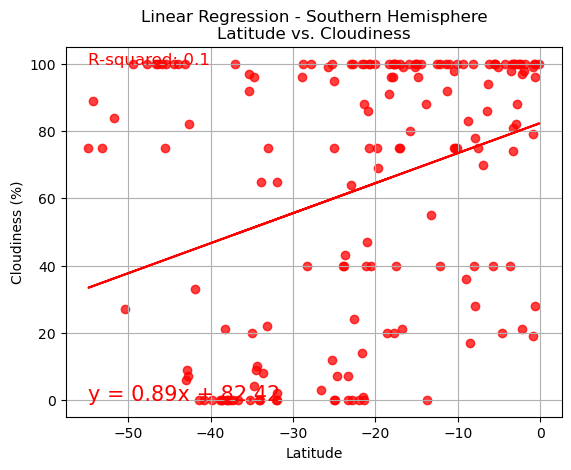

In [46]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Linear Regression - Southern Hemisphere\nLatitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)", "Southern", "red", "Southern_Hemi_Cloudiness")


**Discussion about the linear relationship:** YOUR RESPONSE HERE
For Cloudiness vs. Latitude Linear Regression Plots in both the Northern and Southern Hemispheres, the R-squared values are quite low (close to zero). This suggests that there is little to no linear relationship between latitude and cloudiness in either hemisphere. Based on these linear regression analyses, latitude is not a reliable predictor for cloudiness in either hemisphere. Cloudiness is likely influenced by a combination of factors beyond latitude.

### Wind Speed vs. Latitude Linear Regression Plot

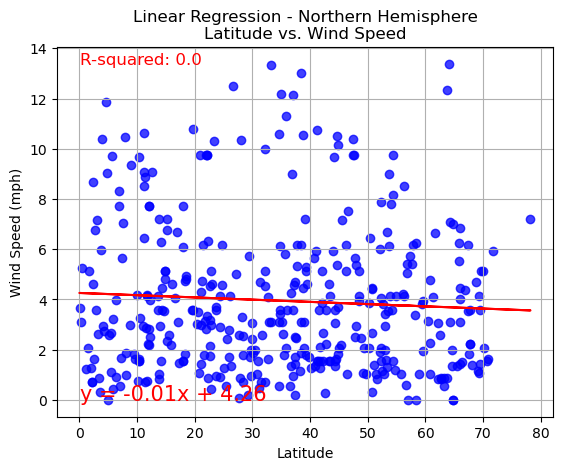

In [48]:
# Northern Hemisphere
# YOUR CODE HERE
# Linear regression on Wind Speed vs. Latitude - Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Linear Regression - Northern Hemisphere\nLatitude vs. Wind Speed",
                       "Latitude", "Wind Speed (mph)", "Northern", "blue", "Northern_Hemi_Wind_Speed")


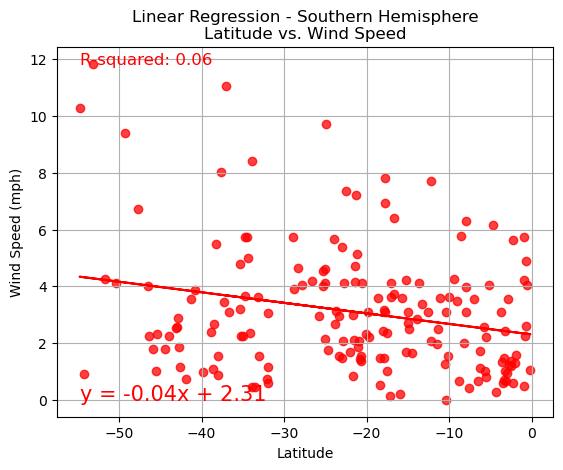

In [49]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Linear Regression - Southern Hemisphere\nLatitude vs. Wind Speed",
                       "Latitude", "Wind Speed (mph)", "Southern", "red", "Southern_Hemi_Wind_Speed")


**Discussion about the linear relationship:** YOUR RESPONSE HERE
These linear regression analyses suggest that latitude alone does not provide a strong explanation for variations in wind speed in either hemisphere. Wind speed is influenced by a complex interplay of factors, including local atmospheric conditions and geography. Further investigation may be needed to gain a more comprehensive understanding of the factors affecting wind speed.